In [1]:
import os, shutil
first_dataset_dir = '../datasets/train1'
second_dataset_dir = '../datasets/train2'
third_dataset_dir = '../datasets/train3'
fourth_dataset_dir = '../datasets/train4'
fifth_dataset_dir = '../datasets/train5'
test_dataset_dir = '../datasets/test'

In [2]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 32

train_ds1 = image_dataset_from_directory(first_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
# 6 % 5 + 1 = 2
val_ds2 = image_dataset_from_directory(second_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds3 = image_dataset_from_directory(third_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds4 = image_dataset_from_directory(fourth_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds5 = image_dataset_from_directory(fifth_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
test_ds = image_dataset_from_directory(test_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')

Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [3]:
print (type(train_ds1))
print (train_ds1.class_names)

full_train_ds = train_ds1.concatenate(train_ds3).concatenate(train_ds4).concatenate(train_ds5)

# Even if we switch datatypes back to the original
# Methods like class_names are not available
# So we keep it as "concatenated dataset" instead of "prefetch dataset"
# full_train_ds = full_train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
# print (full_train_ds.class_names)
print (type(full_train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
['000_airplane', '001_automobile', '002_bird', '003_cat', '004_deer', '005_dog', '006_frog', '007_horse', '008_ship', '009_truck']
<class 'tensorflow.python.data.ops.concatenate_op._ConcatenateDataset'>


In [4]:
for data_batch, labels_batch in full_train_ds:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 32, 32, 3)
labels batch shape: (32, 10)


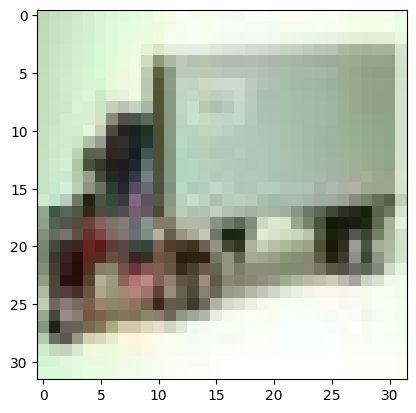

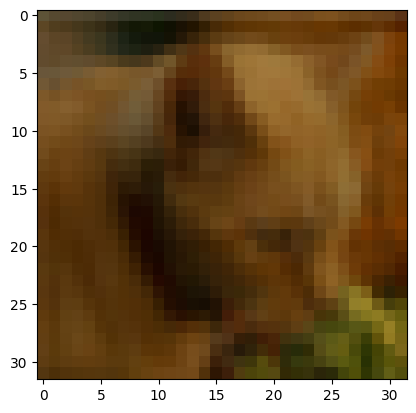

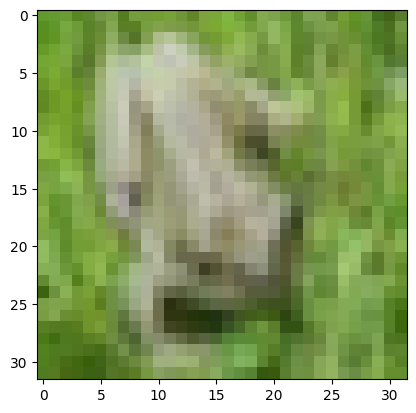

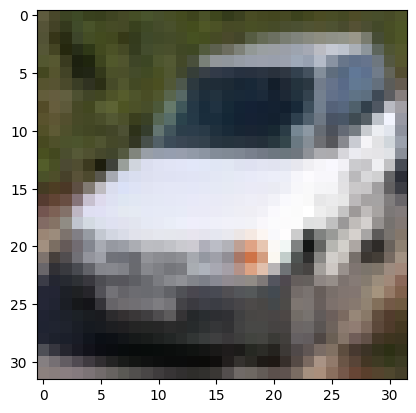

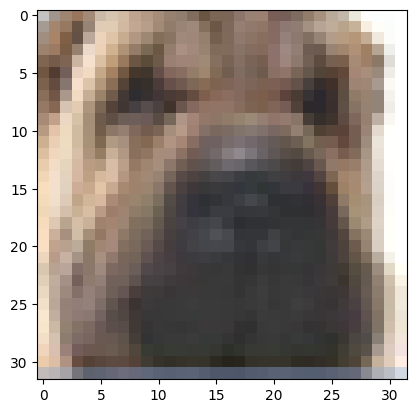

In [5]:
import matplotlib.pyplot as plt
for data_batch, _ in full_train_ds.take(1):
  for i in range(5):
    plt.imshow(data_batch[i].numpy().astype("uint8"))
    plt.show()

In [6]:
from tensorflow import keras
from keras import layers
from keras import models
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
#image size too sort to add another layer
#x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(10, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                        

TESTING DIFERENT OTIMIZERS:

1 - RMSprop

In [8]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), 
              metrics=['acc'])


In [9]:
history = model.fit(full_train_ds, 
                    epochs=30, 
                    validation_data=val_ds2)

Epoch 1/30
1252/1252 [==============================] - 10s 7ms/step - loss: 1.8779 - acc: 0.3160 - val_loss: 1.7171 - val_acc: 0.3696
Epoch 2/30
1252/1252 [==============================] - 10s 8ms/step - loss: 1.5664 - acc: 0.4363 - val_loss: 1.5219 - val_acc: 0.4437
Epoch 3/30
1252/1252 [==============================] - 10s 8ms/step - loss: 1.4386 - acc: 0.4851 - val_loss: 1.3806 - val_acc: 0.5021
Epoch 4/30
1252/1252 [==============================] - 10s 8ms/step - loss: 1.3504 - acc: 0.5199 - val_loss: 1.3174 - val_acc: 0.5360
Epoch 5/30
1252/1252 [==============================] - 10s 8ms/step - loss: 1.2799 - acc: 0.5469 - val_loss: 1.3801 - val_acc: 0.5267
Epoch 6/30
1252/1252 [==============================] - 10s 8ms/step - loss: 1.2206 - acc: 0.5701 - val_loss: 1.2159 - val_acc: 0.5762
Epoch 7/30
1252/1252 [==============================] - 11s 8ms/step - loss: 1.1719 - acc: 0.5880 - val_loss: 1.2059 - val_acc: 0.5771
Epoch 8/30
1252/1252 [==============================] -

RESULTS:

For RMSdrop optimizer -> loss: 0.5891 - acc: 0.8002 - val_loss: 0.9696 - val_acc: 0.6834

TESTING DIFERENT OTIMIZERS:

2 - ADAM

In [10]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy', 
              optimizer="adam",
              metrics=['acc'])


In [11]:
history = model.fit(full_train_ds, 
                    epochs=30, 
                    validation_data=val_ds2)

Epoch 1/30
1252/1252 [==============================] - 10s 8ms/step - loss: 0.9401 - acc: 0.6720 - val_loss: 0.9475 - val_acc: 0.6691
Epoch 2/30
1252/1252 [==============================] - 11s 8ms/step - loss: 0.8159 - acc: 0.7169 - val_loss: 0.9124 - val_acc: 0.6845
Epoch 3/30
1252/1252 [==============================] - 10s 8ms/step - loss: 0.7014 - acc: 0.7546 - val_loss: 0.9273 - val_acc: 0.6894
Epoch 4/30
1252/1252 [==============================] - 11s 9ms/step - loss: 0.5971 - acc: 0.7900 - val_loss: 0.9668 - val_acc: 0.6949
Epoch 5/30
1252/1252 [==============================] - 11s 9ms/step - loss: 0.5054 - acc: 0.8217 - val_loss: 1.0209 - val_acc: 0.6958
Epoch 6/30
1252/1252 [==============================] - 11s 9ms/step - loss: 0.4193 - acc: 0.8523 - val_loss: 1.1052 - val_acc: 0.6930
Epoch 7/30
1252/1252 [==============================] - 11s 9ms/step - loss: 0.3486 - acc: 0.8784 - val_loss: 1.2215 - val_acc: 0.6864
Epoch 8/30
1252/1252 [==============================] -

RESULTS:
For ADAM optimizer -> loss: 0.0909 - acc: 0.9695 - val_loss: 2.7220 - val_acc: 0.6886
